# Pipeline de pre-processamento

### Carregar bibliotecas e dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

sns.set_theme(style="whitegrid")

dataset = pd.read_csv("../dados/Raw/diabetes.csv")

### Identificar e tratar valores inválidos

Conforme identificado no EDA algumas colunas possuem valores zero que são fisiologicamente impossíveis, portanto devem ser tratados como valores ausentes (NaN)

In [3]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

dataset[cols_with_zeros] = dataset[cols_with_zeros].replace(0, np.nan)

### Separar Features e Target

In [4]:
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

### Plot para comparação do dataset antes e apos remoção dos valores invalidos

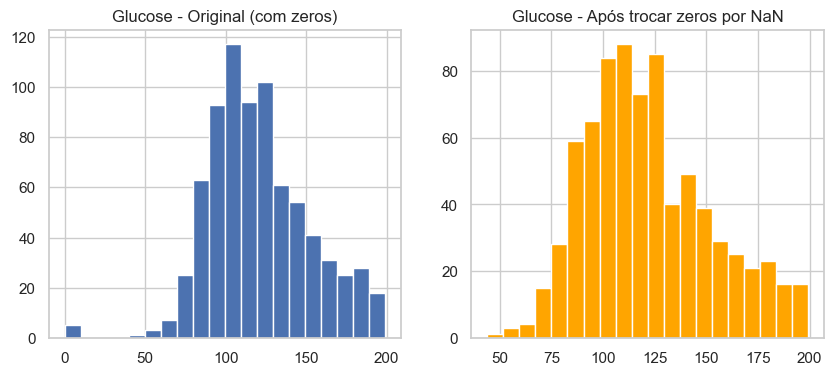

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(pd.read_csv("../dados/Raw/diabetes.csv")["Glucose"], bins=20)
axes[0].set_title("Glucose - Original (com zeros)")
axes[1].hist(dataset["Glucose"].dropna(), bins=20, color='orange')
axes[1].set_title("Glucose - Após trocar zeros por NaN")
plt.show()

### Imputar valores com KNN

KNNImputer será usado para estimar esses valores ausentes.
Ele considera a relação entre todas as features e mantém a distribuição natural do dataset, diferente da substituição por média ou mediana.


In [6]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(dataset.drop('Outcome', axis=1))
X = pd.DataFrame(X_imputed, columns=dataset.drop('Outcome', axis=1).columns)

### Plot para comparação do dataset antes e apos imputação de valores

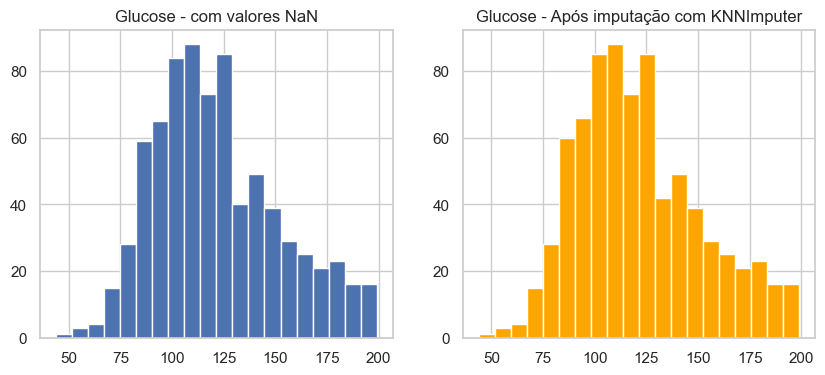

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(dataset["Glucose"], bins=20)
axes[0].set_title("Glucose - com valores NaN")
axes[1].hist(X["Glucose"].dropna(), bins=20, color='orange')
axes[1].set_title("Glucose - Após imputação com KNNImputer")
plt.show()

### Padronizar os valores

Escalamos os dados para garantir que todas as features tenham a mesma importância, principalmente porque SMOTE e alguns algoritmos de ML são sensíveis à magnitude das variáveis

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Comparação Visual - Antes e depois do scaling

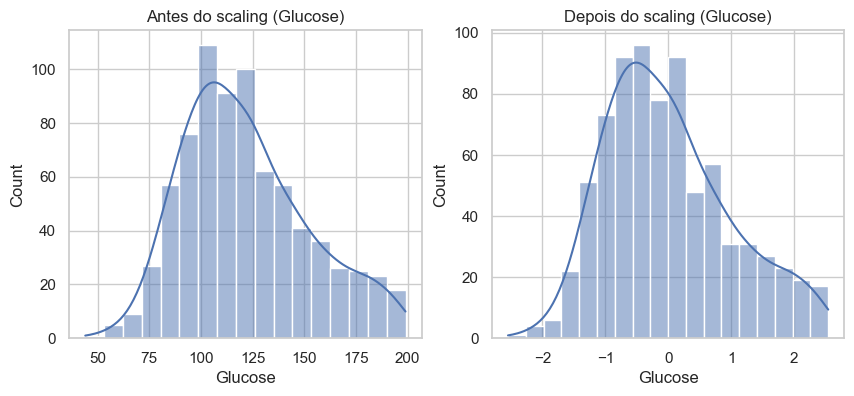

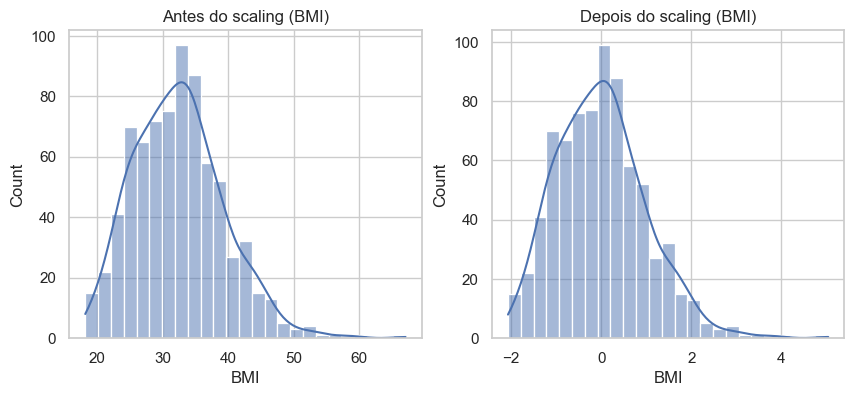

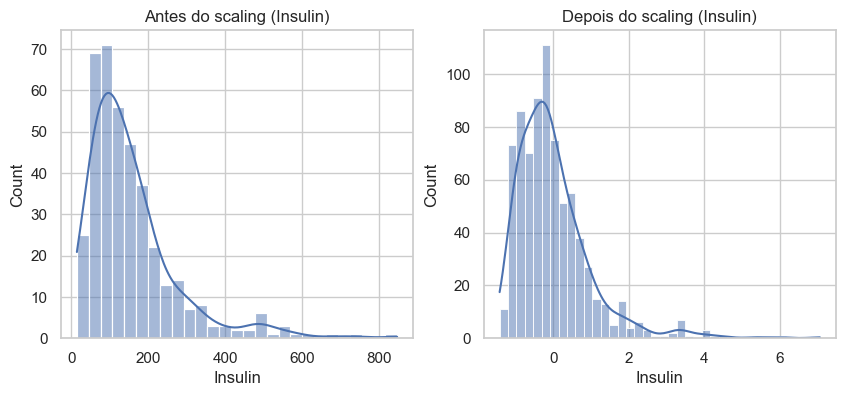

In [12]:
for col in ["Glucose", "BMI", "Insulin"]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(dataset[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Antes do scaling ({col})")
    sns.histplot(X_scaled[col], kde=True, ax=ax[1])
    ax[1].set_title(f"Depois do scaling ({col})")
    plt.show()

### Gerar e Validar dataset final

In [30]:
final_dataset = pd.concat([X_scaled, dataset['Outcome'].reset_index(drop=True)], axis=1)

### Salvar dataset processado

Este CSV será usado no pipeline de modelagem

In [31]:
final_dataset.to_csv('../dados/processados/processado_diabetes.csv', index=False)

print("✅ Pré-processamento concluído!")
print("📁 Arquivo salvo como: diabetes_preprocessed.csv")
print("📊 Dimensões finais:", final_dataset.shape)

✅ Pré-processamento concluído!
📁 Arquivo salvo como: diabetes_preprocessed.csv
📊 Dimensões finais: (768, 9)


### Conclusão do Pré-processamento


O pipeline implementado garantiu a consistência estatística e a comparabilidade entre atributos, corrigindo valores ausentes e eliminando diferenças de escala.
Esses cuidados são essenciais para evitar que os modelos sejam enviesados por outliers ou discrepâncias de magnitude entre variáveis, assegurando um aprendizado mais robusto e confiável.